In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [2]:
f1 = pd.read_csv("historic_data.csv")

In [3]:
f1.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,...,DISTANCE,WHEELS_ON,TAXI_IN,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2019-03-01 00:01:00,00:02:00,01:37:00,01:20:00,UA,1238,N812UA,DEN,BIL,1.0,...,455,117.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-01 00:01:00,00:29:00,01:33:00,01:52:00,EV,6134,N14171,ORD,BNA,28.0,...,409,144.0,8.0,0,NaN,0.0,0.0,19.0,0.0,0.0
2,2019-03-01 00:01:00,NaN,01:53:00,NaN,EV,4682,N15910,ORD,BHM,NaN,...,584,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
3,2019-03-01 00:02:00,23:59:00,03:04:00,02:56:00,UA,1550,N822UA,ORD,BTV,-3.0,...,763,252.0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-01 00:02:00,00:36:00,03:22:00,03:30:00,UA,1502,N33262,ORD,BOS,34.0,...,867,326.0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [4]:
f1['SCHEDULED_DEPARTURE'] = pd.to_datetime(f1['SCHEDULED_DEPARTURE'])
f1['DEPARTURE_TIME'] = pd.to_datetime(f1['DEPARTURE_TIME'])
f1['SCHEDULED_ARRIVAL'] = pd.to_datetime(f1['SCHEDULED_ARRIVAL'])
f1['ARRIVAL_TIME'] = pd.to_datetime(f1['ARRIVAL_TIME'])

In [5]:
for dataset in f1:
    f1.loc[f1['AIR_SYSTEM_DELAY'] <= 15, 'Status'] = 0
    f1.loc[f1['AIR_SYSTEM_DELAY'] >= 15, 'Status'] = 1
    f1.loc[f1['AIR_SYSTEM_DELAY'] >= 60, 'Status'] = 2
    f1.loc[f1['CANCELLED'] == 1, 'Status'] = 3
    

In [6]:
f1 =f1.drop(['CANCELLED', 'DEPARTURE_TIME','DISTANCE','ELAPSED_TIME'], axis = 1)

In [7]:
f1.columns

Index(['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Status'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


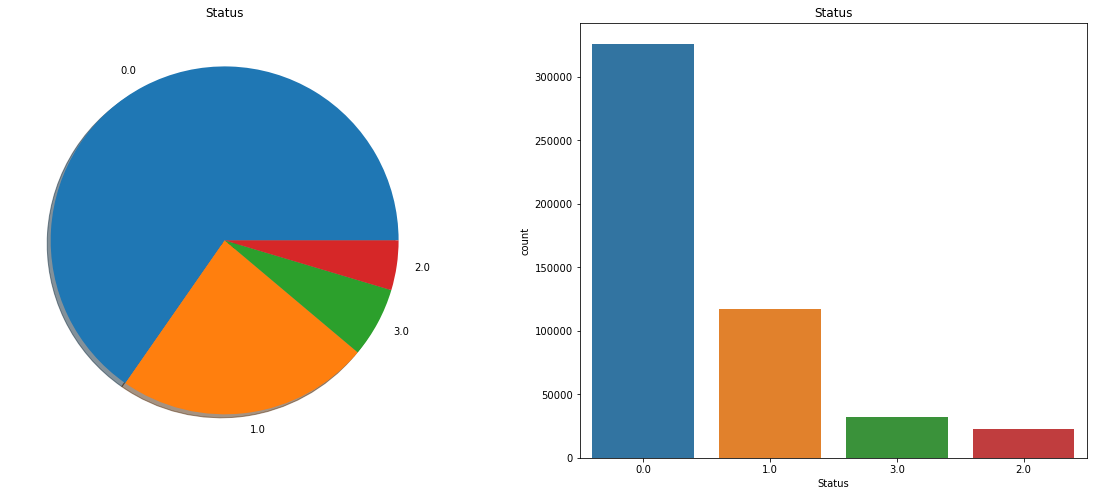

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), cancelled (3)


In [8]:
f,ax=plt.subplots(1,2,figsize=(20,8))
f1['Status'].value_counts().plot.pie(ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = f1['Status'].value_counts().index, data=f1,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), cancelled (3)')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


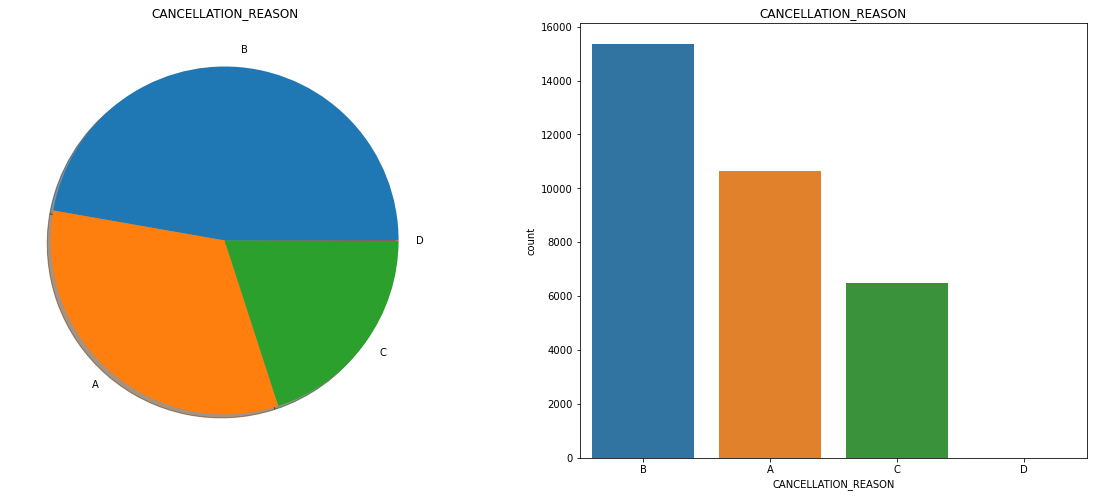

Reason for Cancellation of flight: 0 - Airline/Carrier; B - Weather; C - National Air System; D - Security


In [9]:
f,ax=plt.subplots(1,2,figsize=(20,8))
f1['CANCELLATION_REASON'].value_counts().plot.pie(ax=ax[0],shadow=True)
ax[0].set_title('CANCELLATION_REASON')
ax[0].set_ylabel('')
sns.countplot('CANCELLATION_REASON',order = f1['CANCELLATION_REASON'].value_counts().index, data=f1,ax=ax[1])
ax[1].set_title('CANCELLATION_REASON')
plt.show()
print('Reason for Cancellation of flight: 0 - Airline/Carrier; B - Weather; C - National Air System; D - Security')

In [10]:
Delayedflights = f1[(f1.Status >= 1) &(f1.Status < 3)]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


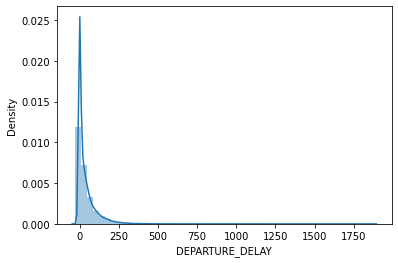

In [11]:
sns.distplot(Delayedflights['DEPARTURE_DELAY'])
plt.show()

In [12]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['DEPARTURE_DELAY'].skew())
print("Kurtosis: %f" % Delayedflights['DEPARTURE_DELAY'].kurt())

Skewness: 3.930397
Kurtosis: 35.082618


## It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time. 

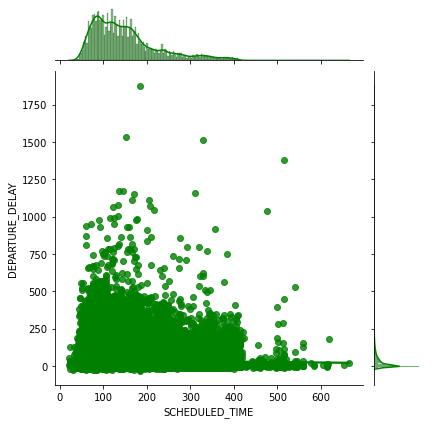

In [13]:
sns.jointplot(x='SCHEDULED_TIME',y='DEPARTURE_DELAY',data=Delayedflights,kind='reg', color='g',fit_reg = True)
plt.show()

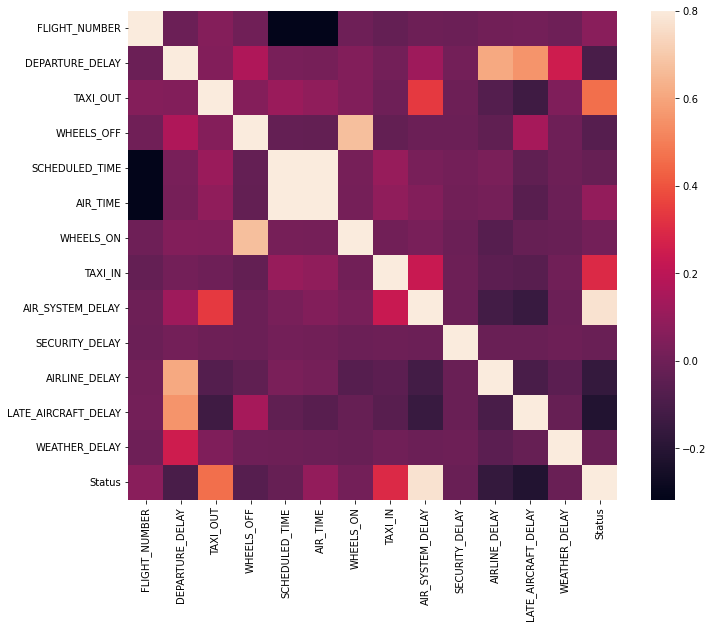

In [14]:
corrmat = f1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


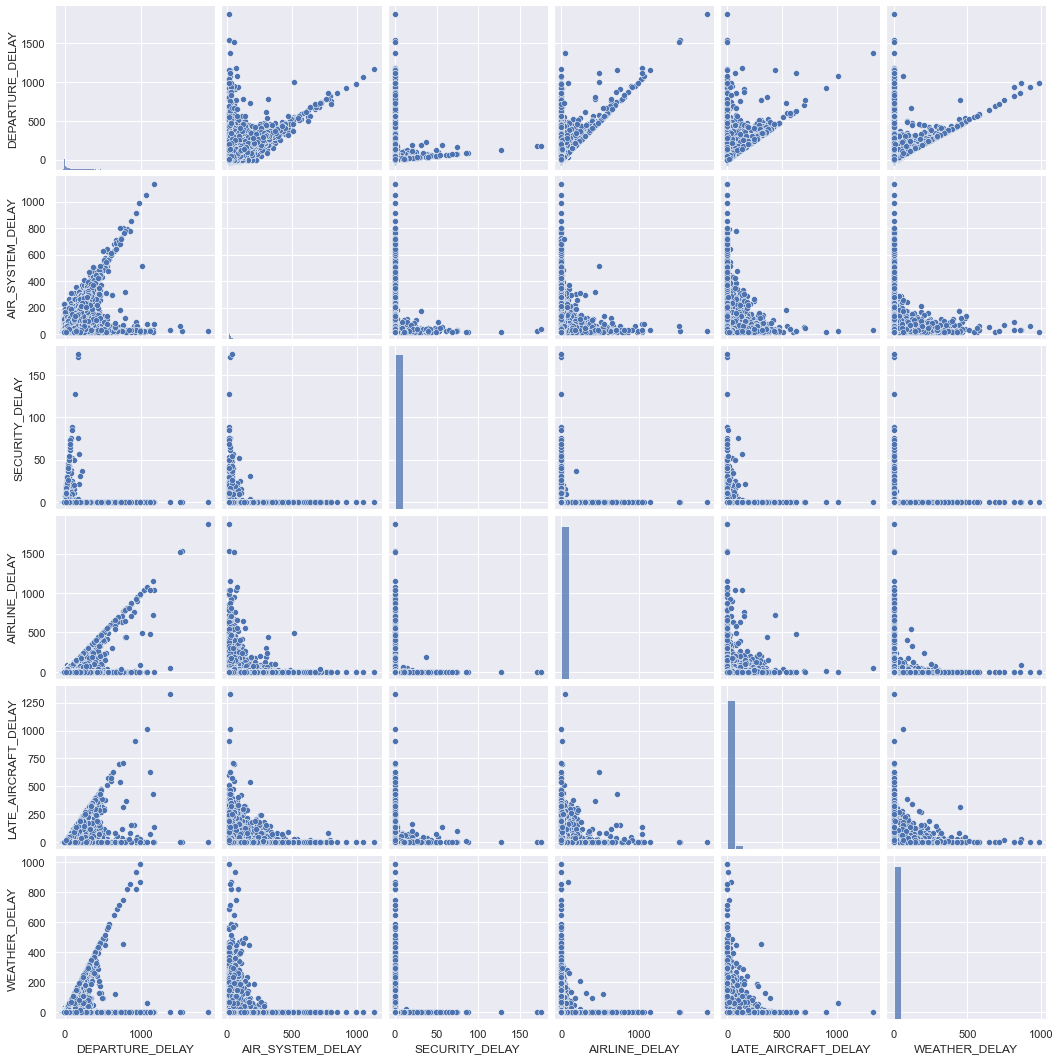

In [15]:
sns.set()
cols = ['DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

In [16]:
f1['AIRLINE'].unique()

array(['UA', 'EV', 'OO', 'MQ', 'AA', 'DL', 'F9', 'NK', 'AS', 'B6', 'VX',
       'HA', 'WN', 'US'], dtype=object)

In [17]:
# f,ax=plt.subplots(1,2,figsize=(20,8))
# sns.barplot('DESTINATION_AIRPORT','FLIGHT_NUMBER', data=Delayedflights,ax=ax[0], order=['UA', 'EV', 'OO', 'MQ', 'AA', 'DL', 'F9', 'NK', 'AS', 'B6', 'VX','HA', 'WN', 'US']
# # ax[0].set_title('Average Delay by Airline')
# sns.boxplot('AIRLINE','FLIGHT_NUMBER', data=Delayedflights,ax=ax[1], order=['UA', 'EV', 'OO', 'MQ', 'AA', 'DL', 'F9', 'NK', 'AS', 'B6', 'VX', 'HA', 'WN', 'US']
# ax[1].set_title('Delay Distribution by Airline')
# plt.close(2)
# plt.show()

# Data Pre-processing

In [18]:
f1.describe()

,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Status
count,2.458628e+06,2.427857e+06,2.426448e+06,2.426448e+06,2.458626e+06,2.418528e+06,2.424831e+06,2.424831e+06,466843.000000,466843.000000,466843.000000,466843.000000,466843.000000,499371.000000
mean,2.151463e+03,1.045117e+01,1.604956e+01,1.357819e+03,1.427319e+02,1.143148e+02,1.465219e+03,7.469090e+00,13.770884,0.093458,19.361297,24.669576,3.206418,0.523186
std,1.744655e+03,3.918432e+01,8.839148e+00,5.047600e+02,7.570307e+01,7.276542e+01,5.310933e+02,5.662942e+00,30.039212,2.359165,49.437738,44.790459,21.776314,0.855977
min,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,7.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.230000e+02,-5.000000e+00,1.100000e+01,9.330000e+02,8.600000e+01,6.100000e+01,1.049000e+03,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.684000e+03,-1.000000e+00,1.400000e+01,1.343000e+03,1.240000e+02,9.500000e+01,1.505000e+03,6.000000e+00,1.000000,0.000000,2.000000,4.000000,0.000000,0.000000
75%,3.157000e+03,8.000000e+00,1.900000e+01,1.758000e+03,1.750000e+02,1.440000e+02,1.912000e+03,9.000000e+00,17.000000,0.000000,19.000000,31.000000,0.000000,1.000000
max,9.855000e+03,1.878000e+03,2.000000e+02,2.400000e+03,7.050000e+02,6.900000e+02,2.400000e+03,2.480000e+02,1134.000000,440.000000,1878.000000,1331.000000,1211.000000,3.000000


In [19]:
f1.isnull().sum()

SCHEDULED_DEPARTURE          0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             33797
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               4557
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
DEPARTURE_DELAY          30771
TAXI_OUT                 32180
WHEELS_OFF               32180
SCHEDULED_TIME               2
AIR_TIME                 40100
WHEELS_ON                33797
TAXI_IN                  33797
CANCELLATION_REASON    2426100
AIR_SYSTEM_DELAY       1991785
SECURITY_DELAY         1991785
AIRLINE_DELAY          1991785
LATE_AIRCRAFT_DELAY    1991785
WEATHER_DELAY          1991785
Status                 1959257
dtype: int64

In [20]:
#deleting values with more than 15000000 null values.
f1 = f1.drop(['AIR_SYSTEM_DELAY', 'FLIGHT_NUMBER','TAIL_NUMBER','SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis = 1)

In [21]:
#Fill the null values
f1 = f1.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [22]:
# get all categorical columns in the dataframe
catCols = [col for col in f1.columns if f1[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    f1[item] = lb_make.fit_transform(f1[item])

In [23]:
f1.dtypes

SCHEDULED_DEPARTURE    datetime64[ns]
SCHEDULED_ARRIVAL      datetime64[ns]
ARRIVAL_TIME           datetime64[ns]
AIRLINE                         int32
ORIGIN_AIRPORT                  int32
DESTINATION_AIRPORT             int32
DEPARTURE_DELAY               float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
AIR_TIME                      float64
WHEELS_ON                     float64
TAXI_IN                       float64
CANCELLATION_REASON             int32
Status                        float64
dtype: object

In [24]:
f1.columns

Index(['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'AIRLINE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
       'CANCELLATION_REASON', 'Status'],
      dtype='object')

In [25]:
f2 = f1.drop(['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','ARRIVAL_TIME'], axis = 1)

In [37]:
for colm in f2.columns:
    Q1 = f2[colm].quantile(0.25)
    Q3 = f2[colm].quantile(0.75)
    IQR = Q3 - Q1
    f2 = f2[(f2[colm] >= Q1 - 1.5 * IQR) & 
                                      (f2[colm] <= Q3 + 1.5 * IQR)]

In [38]:
f2.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,CANCELLATION_REASON,Status
0,10,82,32,1.0,14.0,16.0,96.0,61.0,117.0,3.0,1,0.0
3,10,224,48,-3.0,12.0,11.0,122.0,101.0,252.0,4.0,1,0.0
9,4,224,54,-5.0,18.0,17.0,81.0,51.0,208.0,7.0,1,0.0
15,0,64,49,-1.0,12.0,16.0,93.0,73.0,129.0,3.0,1,0.0
16,10,82,103,1.0,11.0,17.0,223.0,182.0,519.0,6.0,1,0.0


In [39]:
f2.shape

(1472544, 12)

In [42]:
f2.count

<bound method DataFrame.count of          AIRLINE  ORIGIN_AIRPORT  DESTINATION_AIRPORT  DEPARTURE_DELAY  \
0             10              82                   32              1.0   
3             10             224                   48             -3.0   
9              4             224                   54             -5.0   
15             0              64                   49             -1.0   
16            10              82                  103              1.0   
...          ...             ...                  ...              ...   
2458606       10             172                   83             -3.0   
2458607        9             164                   91             -6.0   
2458611        5              82                  298             -9.0   
2458612        5              82                  189             -7.0   
2458623        0             170                  224             -5.0   

         TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  AIR_TIME  WHEELS_ON  TAXI_IN  \

In [44]:
f2.duplicated().sum()

2369

In [46]:
f2 = f2.drop_duplicates()

In [48]:
f2[[ 'AIRLINE','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT','WHEELS_OFF', 'SCHEDULED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN','CANCELLATION_REASON', 'Status']] = f1[[ 'AIRLINE','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT','WHEELS_OFF', 'SCHEDULED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN','CANCELLATION_REASON', 'Status']]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [50]:
f2.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,CANCELLATION_REASON,Status
0,10,82,32,1.0,14.0,16.0,96.0,61.0,117.0,3.0,1,0.0
3,10,224,48,-3.0,12.0,11.0,122.0,101.0,252.0,4.0,1,0.0
9,4,224,54,-5.0,18.0,17.0,81.0,51.0,208.0,7.0,1,0.0
15,0,64,49,-1.0,12.0,16.0,93.0,73.0,129.0,3.0,1,0.0
16,10,82,103,1.0,11.0,17.0,223.0,182.0,519.0,6.0,1,0.0


# Modelling of Data

In [53]:
F3 = np.array(f2)

In [56]:
F3

array([[ 10.,  82.,  32., ...,   3.,   1.,   0.],
       [ 10., 224.,  48., ...,   4.,   1.,   0.],
       [  4., 224.,  54., ...,   7.,   1.,   0.],
       ...,
       [  5.,  82., 298., ...,   6.,   1.,   0.],
       [  5.,  82., 189., ...,   7.,   1.,   0.],
       [  0., 170., 224., ...,   4.,   1.,   0.]])

In [62]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA(8)
# fit on data
pca.fit(F3)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
PCA_data= pca.transform(F3)
print(PCA_data)

[[ 1.59829691e-04  2.24544115e-03 -4.15883786e-03 -7.23235911e-04
  -2.75203318e-04 -7.00320093e-01  1.44818166e-03  1.71728055e-03
  -7.13809279e-01  2.68383431e-04  0.00000000e+00  0.00000000e+00]
 [ 6.26955726e-04 -3.15704406e-02  1.24347237e-02 -3.69837451e-05
  -2.01433351e-04  7.10844385e-01 -5.85105625e-02 -5.61079045e-02
  -6.97836757e-01 -8.87934840e-04 -0.00000000e+00 -0.00000000e+00]
 [ 6.65373787e-03  6.93006827e-01  7.05661239e-01 -5.27135763e-04
  -1.05064475e-03  1.70793467e-02  9.98399192e-02  1.05558458e-01
  -1.82297167e-02 -1.86417062e-03  0.00000000e+00  0.00000000e+00]
 [ 2.19086876e-04  7.12313863e-01 -7.01107640e-01 -1.25387565e-03
  -3.03865137e-03  2.56699792e-02  3.07120853e-03  1.98871827e-04
  -1.88483259e-02  4.74388357e-03 -0.00000000e+00 -0.00000000e+00]
 [-6.14029783e-03 -1.06223136e-01 -1.01072495e-01  6.12926234e-03
   5.75419063e-03  5.74473457e-02  7.16157217e-01  6.77777197e-01
  -5.30317248e-02  4.11879819e-03 -0.00000000e+00 -0.00000000e+00]
 [-2.

In [63]:
PCA_data.shape

(1470175, 8)